# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
company_data = pd.read_csv("C:\\Users\\Swathi\\Desktop\\Excelr Classes\\Assignments\\12.Decision Trees\\Company_Data.csv")
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Analyse Data

In [3]:
print("Number of rows: ", len(company_data))
print("Number of columns: ",len(company_data.columns))
print("Number of rows and columns: ",company_data.shape)
print("Number of elements: ",company_data.size)
# print("Number of rows, columns, etc: ", company_data.info())
# print ("Data type:\n",company_data.dtypes)
# print ("Identify outliers & other info like Mean,median,max,min etc:\n\n",company_data.describe())

Number of rows:  400
Number of columns:  11
Number of rows and columns:  (400, 11)
Number of elements:  4400


Assign range for taget column as per problem statement

In [4]:
company_data['Sales_Range'] = pd.cut(company_data.Sales,bins=[0,3,6,10,14,20],
                                     labels=['Poor','Below_Avg','Avg','Above_Avg','Outstanding'],include_lowest=True)

# Visualize data

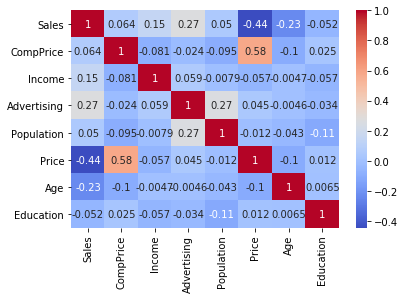

In [5]:
#Correlation heatmap
corr = company_data.corr()
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm')

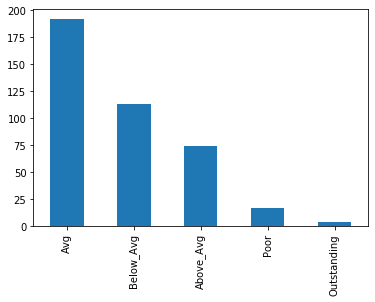

Avg            192
Below_Avg      113
Above_Avg       74
Poor            17
Outstanding      4
Name: Sales_Range, dtype: int64


In [6]:
company_data['Sales_Range'].value_counts(sort=True).plot.bar()
plt.show()
print(company_data['Sales_Range'].value_counts())

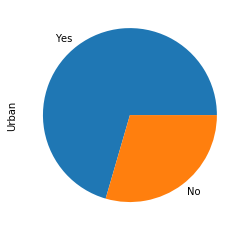

Yes    282
No     118
Name: Urban, dtype: int64


In [7]:
company_data['Urban'].value_counts().plot.pie()
plt.show()
print(company_data['Urban'].value_counts())

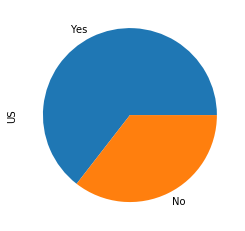

Yes    258
No     142
Name: US, dtype: int64


In [8]:
company_data['US'].value_counts().plot.pie()
plt.show()
print(company_data['US'].value_counts())

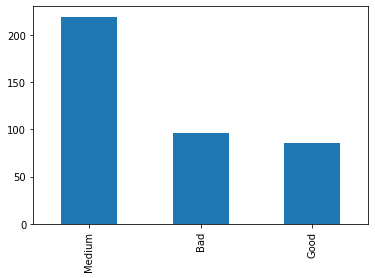

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [9]:
company_data['ShelveLoc'].value_counts(sort=True).plot.bar()
plt.show()
print(company_data['ShelveLoc'].value_counts())

LabelEncoder encode labels with a value between 0 and n_classes-1

In [10]:
from sklearn.preprocessing import LabelEncoder

label= LabelEncoder()
company_data1 = company_data[['Urban','US']].apply(label.fit_transform)
company_data1 = company_data1.rename(columns={'Urban':'Urban_num','US':'US_num'})
company_data1.head()

,Urban_num,US_num
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0


Create dummy values for columns "ShelveLoc"

In [11]:
company_data = pd.get_dummies(company_data, columns=['ShelveLoc'])
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Sales_Range,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,Yes,Yes,Avg,1,0,0
1,11.22,111,48,16,260,83,65,10,Yes,Yes,Above_Avg,0,1,0
2,10.06,113,35,10,269,80,59,12,Yes,Yes,Above_Avg,0,0,1
3,7.40,117,100,4,466,97,55,14,Yes,Yes,Avg,0,0,1
4,4.15,141,64,3,340,128,38,13,Yes,No,Below_Avg,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,Yes,Yes,Above_Avg,0,1,0
396,6.14,139,23,3,37,120,55,11,No,Yes,Avg,0,0,1
397,7.41,162,26,12,368,159,40,18,Yes,Yes,Avg,0,0,1
398,5.94,100,79,7,284,95,50,12,Yes,Yes,Below_Avg,1,0,0


 Concat to form a single dataframe

In [12]:
company_data = pd.concat([company_data,company_data1], axis=1, sort=False)
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Sales_Range,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_num,US_num
0,9.50,138,73,11,276,120,42,17,Yes,Yes,Avg,1,0,0,1,1
1,11.22,111,48,16,260,83,65,10,Yes,Yes,Above_Avg,0,1,0,1,1
2,10.06,113,35,10,269,80,59,12,Yes,Yes,Above_Avg,0,0,1,1,1
3,7.40,117,100,4,466,97,55,14,Yes,Yes,Avg,0,0,1,1,1
4,4.15,141,64,3,340,128,38,13,Yes,No,Below_Avg,1,0,0,1,0


 Drop non numerical columns

In [13]:
company_data =company_data.drop(columns={'Sales','Urban','US'},axis=1)

company_data = company_data[["CompPrice","Income","Advertising","Population","Price","Age",
                             "Education","Urban_num","US_num","ShelveLoc_Bad","ShelveLoc_Good","ShelveLoc_Medium","Sales_Range"]]


company_data.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_num,US_num,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Sales_Range
0,138,73,11,276,120,42,17,1,1,1,0,0,Avg
1,111,48,16,260,83,65,10,1,1,0,1,0,Above_Avg
2,113,35,10,269,80,59,12,1,1,0,0,1,Above_Avg
3,117,100,4,466,97,55,14,1,1,0,0,1,Avg
4,141,64,3,340,128,38,13,1,0,1,0,0,Below_Avg


 Assign Predictors value and Target Value

In [14]:
colnames=list(company_data.columns)
predictors = colnames[:12]
target=colnames[12]
print("predictors:\n",predictors)
print("target:\n",target)

predictors:
 ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'Urban_num', 'US_num', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium']
target:
 Sales_Range


In [15]:
X = company_data[predictors]
Y = company_data[target]

# Model Development

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")
rf.fit(X,Y) # Fitting RandomForestClassifier model from sklearn.ensemble 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=3,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [17]:
#### Attributes that comes along with RandomForest function
rf.estimators_ 
rf.classes_ # class labels (output)
rf.n_classes_ # Number of levels in class labels 
rf.n_features_  # Number of input features in model 8 here.
rf.n_outputs_ # Number of outputs when fit performed
rf.oob_score_  

0.525

In [18]:
rf.predict(X)
company_data['rf_pred'] = rf.predict(X)
cols = ['rf_pred','Sales_Range']
company_data[cols].head()
company_data["Sales_Range"]

0            Avg
1      Above_Avg
2      Above_Avg
3            Avg
4      Below_Avg
         ...    
395    Above_Avg
396          Avg
397          Avg
398    Below_Avg
399          Avg
Name: Sales_Range, Length: 400, dtype: category
Categories (5, object): [Poor < Below_Avg < Avg < Above_Avg < Outstanding]

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(company_data["Sales_Range"],company_data['rf_pred']) # Confusion matrix

pd.crosstab(company_data["Sales_Range"],company_data['rf_pred'])

rf_pred,Above_Avg,Avg,Below_Avg,Outstanding,Poor
Sales_Range,,,,,
Poor,0,0,0,0,17
Below_Avg,0,0,113,0,0
Avg,0,192,0,0,0
Above_Avg,74,0,0,0,0
Outstanding,0,0,0,4,0


In [22]:
print("Accuracy",(74+192+1134+17)/(74+192+1134+17)*100)

Accuracy 100.0
